In [40]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg
from bsedata.bse import BSE

In [9]:
df=pd.read_csv("NIFTY 50 - HistoricalPE_PBDIV_Data.csv")


,Date,P/E
0,12 Aug 2022,21.18
1,11 Aug 2022,21.29
2,10 Aug 2022,21.11
3,08 Aug 2022,21.02
4,05 Aug 2022,20.86
...,...,...
5872,07 Jan 1999,12.46
5873,06 Jan 1999,12.11
5874,05 Jan 1999,11.84
5875,04 Jan 1999,11.72


In [33]:
def freq(df,frequency):
    return df.resample(frequency,on='Date').min()


def analysis(df,col,frequency):
    df=df.loc[0::,['Date',col]]
    df['Date']=pd.to_datetime(df['Date'])
    df=freq(df,frequency)
    df=df.reset_index()
    df['log_ratio']=np.log(df[col].shift(-1) / df[col])
    df['pct_change']=df[col].pct_change()
    plt.plot(df['Date'],df['pct_change'])
    plt.show()
    plt.hist(df['pct_change'],200)
    plt.show()

    


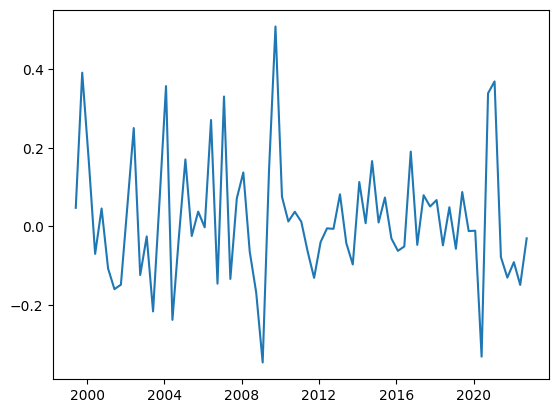

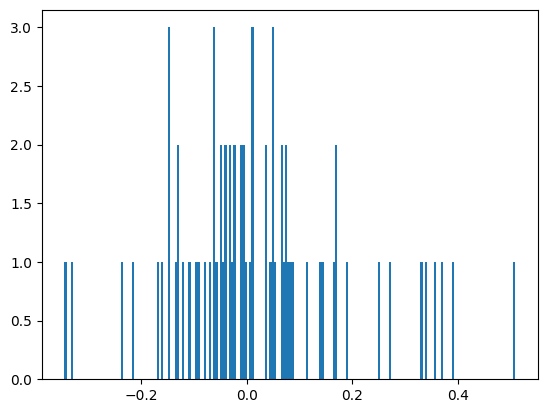

In [37]:
analysis(df,'P/E','4M')

,Date,Open,High,Low,Close
0,12 Aug 2022,17659.65,17724.65,17597.85,17698.15
1,11 Aug 2022,17711.65,17719.30,17631.95,17659.00
2,10 Aug 2022,17566.10,17566.10,17442.80,17534.75
3,08 Aug 2022,17401.50,17548.80,17359.75,17525.10
4,05 Aug 2022,17423.65,17474.40,17348.75,17397.50
...,...,...,...,...,...
7784,10 Jul 1990,NaN,NaN,NaN,288.69
7785,09 Jul 1990,NaN,NaN,NaN,289.69
7786,06 Jul 1990,NaN,NaN,NaN,289.04
7787,05 Jul 1990,NaN,NaN,NaN,284.04
